In [1]:
import pandas as pd

df = pd.read_parquet("../data/processed/features.parquet")
df.head()
df.describe()
df.columns


Index(['ts', 'midprice_return_mean', 'midprice_return_std', 'bid_ask_spread',
       'trade_intensity', 'order_book_imbalance', 'window_size',
       'window_duration', 'pair', 'raw_price'],
      dtype='object')

In [2]:
df['midprice_return_std'].describe(percentiles=[0.95, 0.99, 0.999])

count    4.300000e+01
mean     4.564186e-06
std      5.073342e-06
min      0.000000e+00
50%      5.234038e-07
95%      1.395684e-05
99%      1.466023e-05
99.9%    1.472693e-05
max      1.473435e-05
Name: midprice_return_std, dtype: float64

In [3]:
df["label"] = (df["midprice_return_std"] >= 0.000015).astype(int)
df["label"].value_counts(normalize=True)

label
0    1.0
Name: proportion, dtype: float64

In [4]:
df.isnull().sum()
(df==0).mean()

ts                      0.000000
midprice_return_mean    0.488372
midprice_return_std     0.488372
bid_ask_spread          0.000000
trade_intensity         0.000000
order_book_imbalance    0.000000
window_size             0.000000
window_duration         0.000000
pair                    0.000000
raw_price               0.000000
label                   1.000000
dtype: float64

In [5]:
df.corr(numeric_only=True)

,ts,midprice_return_mean,midprice_return_std,bid_ask_spread,trade_intensity,order_book_imbalance,window_size,window_duration,raw_price,label
ts,1.000000,-0.573143,0.798768,0.774865,0.541474,0.774869,0.966287,1.000000,-0.625288,NaN
midprice_return_mean,-0.573143,1.000000,-0.684860,-0.692348,-0.519514,-0.692390,-0.613574,-0.573143,0.975541,NaN
midprice_return_std,0.798768,-0.684860,1.000000,0.965662,0.711248,0.965662,0.893954,0.798768,-0.689975,NaN
bid_ask_spread,0.774865,-0.692348,0.965662,1.000000,0.734344,1.000000,0.879831,0.774865,-0.678656,NaN
trade_intensity,0.541474,-0.519514,0.711248,0.734344,1.000000,0.734344,0.698692,0.541474,-0.510566,NaN
order_book_imbalance,0.774869,-0.692390,0.965662,1.000000,0.734344,1.000000,0.879832,0.774869,-0.678700,NaN
window_size,0.966287,-0.613574,0.893954,0.879831,0.698692,0.879832,1.000000,0.966287,-0.658238,NaN
window_duration,1.000000,-0.573143,0.798768,0.774865,0.541474,0.774869,0.966287,1.000000,-0.625288,NaN
raw_price,-0.625288,0.975541,-0.689975,-0.678656,-0.510566,-0.678700,-0.658238,-0.625288,1.000000,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df["ts"].diff().describe()

count    42.000000
mean      1.016017
std       1.972197
min       0.000131
25%       0.000258
50%       0.255105
75%       1.050501
max      10.495770
Name: ts, dtype: float64

<Axes: xlabel='ts'>

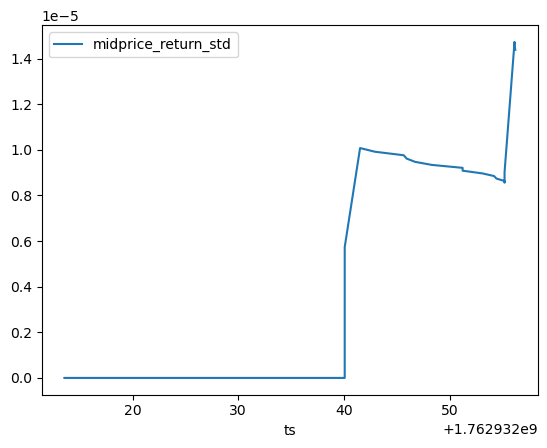

In [8]:
df[["ts","midprice_return_std"]].plot(x="ts",y="midprice_return_std")